# Dynamic Pricing Case Study --- EDA using Python


### About the Dataset:

The given dataset consists of data related to ride-sharing service costs, encompassing various factors that could influence the dynamic pricing model of rides. It includes 1,000 records with the following key attributes:
- Number_of_Riders: The number of riders participating in the ride.
- Number_of_Drivers: The number of drivers available at the time of booking.
- Location_Category: The category of the location (Urban, Suburban, Rural).
- Customer_Loyalty_Status: The loyalty status of the customer (e.g., Silver, Regular).
- Number_of_Past_Rides: The number of past rides the customer has had.
- Average_Ratings: The average ratings given to the drivers by the customer.
- Time_of_Booking: The time of the day when the booking was made.
- Vehicle_Type: The type of vehicle booked for the ride.
- Expected_Ride_Duration: The expected duration of the ride in minutes.
- Historical_Cost_of_Ride: The cost of the ride, which serves as the target variable for predictive modeling.

### Business Problem:

Analyze the data to identify and select the most important features for predicting the Historical_Cost_of_Ride.

## 1. Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/Users/samiashaukat/Documents/AtomCamp DS BC/Python /EDA A2 dynamic_pricing.csv')

In [ ]:
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


## 2. Data Quality Check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [ ]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

## 3. Analyze the Distribution of Numerical Features

In [ ]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


- The average number of riders per ride is 60.37, which is significantly higher than the average of 27.08 drivers per ride, indicating a potential imbalance in supply and demand. This might lead to longer wait times for riders or reduced earnings for drivers during peak hours.
- The average number of past rides indicates a moderately experienced rider base.
- The average rating of 4.26 out of 5 suggests generally positive customer satisfaction.
- Expected ride duration varies widely, from 10 to 180 minutes, influencing the distribution of historical ride costs, which range from 25.99 to $836.12.

## 4. Plot Distributions for Numerical Features

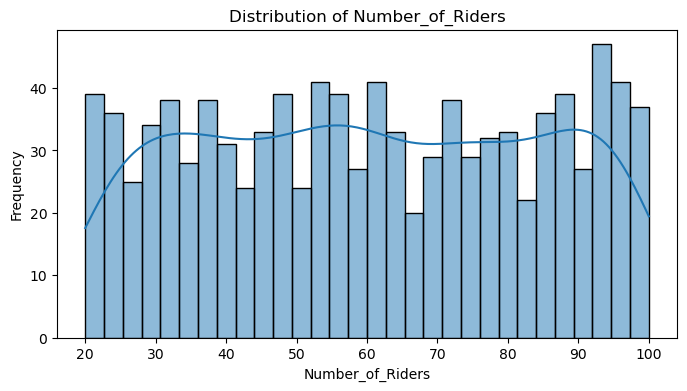

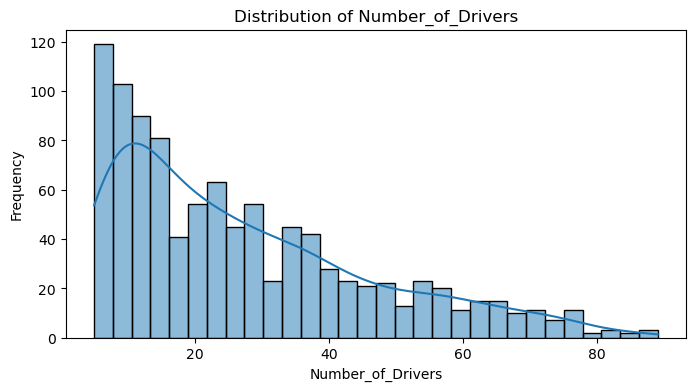

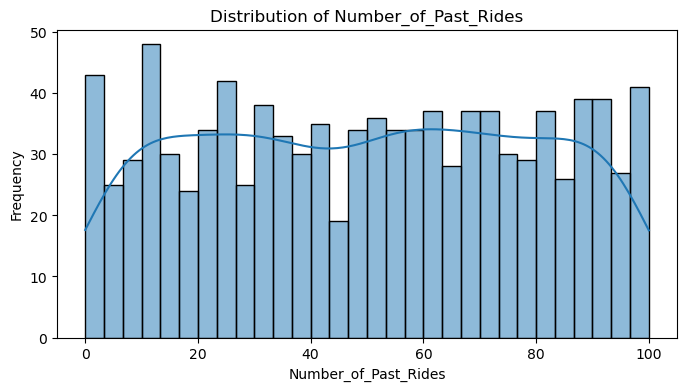

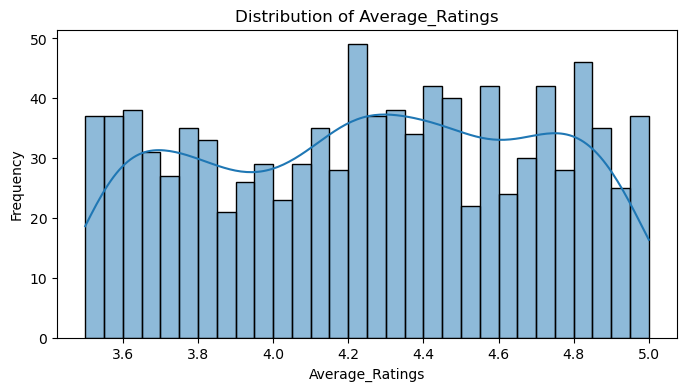

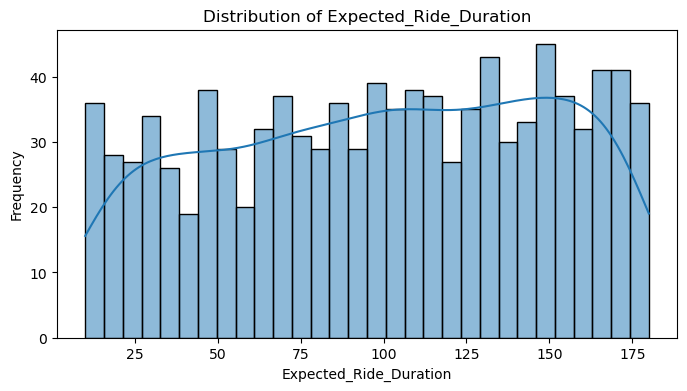

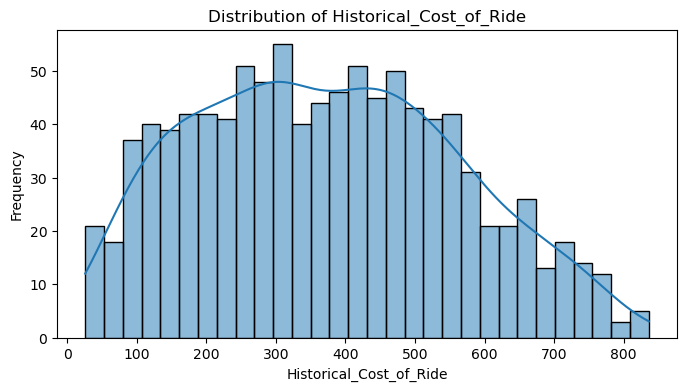

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(visible = False)
    plt.show()

## 5. Exploring Categorical Features

In [ ]:
df.describe(include = object)

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


- Urban areas account for the largest proportion of bookings (346 out of 1000), indicating a higher demand or supply concentration in urban areas.
- The customer base is relatively evenly distributed across the three loyalty statuses, with Silver being the most common.
- Nighttime bookings are the most frequent, suggesting higher demand or availability during this period.
- Premium vehicle type is the most popular choice, accounting for more than half of the bookings.

## 6. Plot to show Count of Each Category

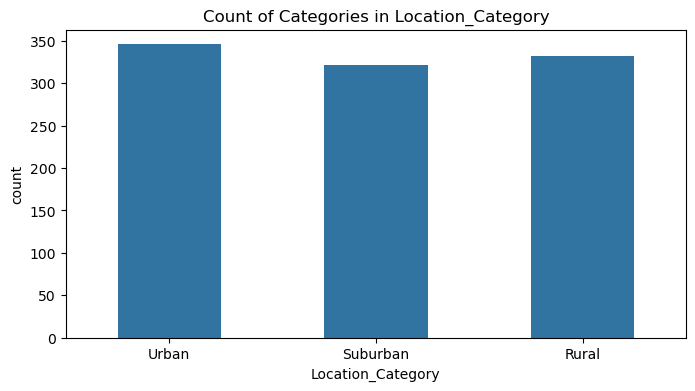

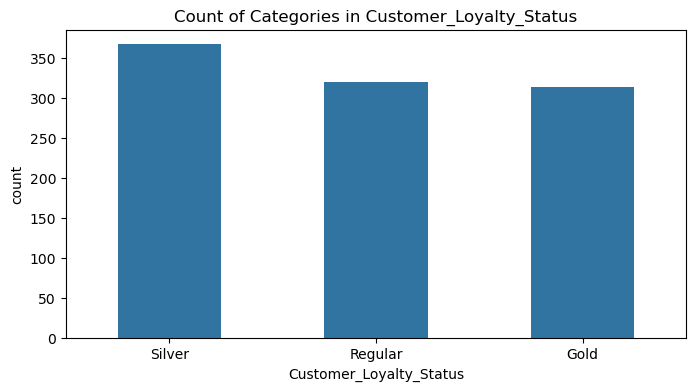

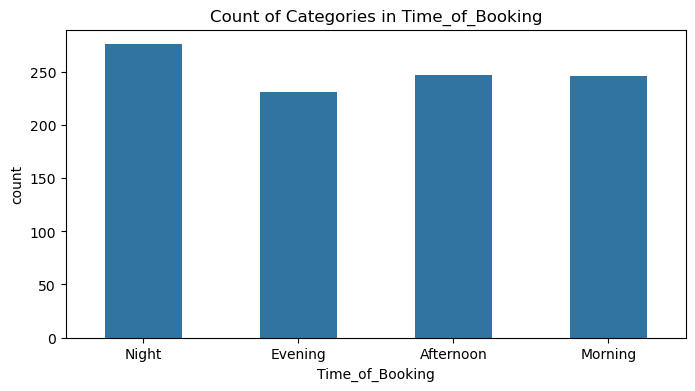

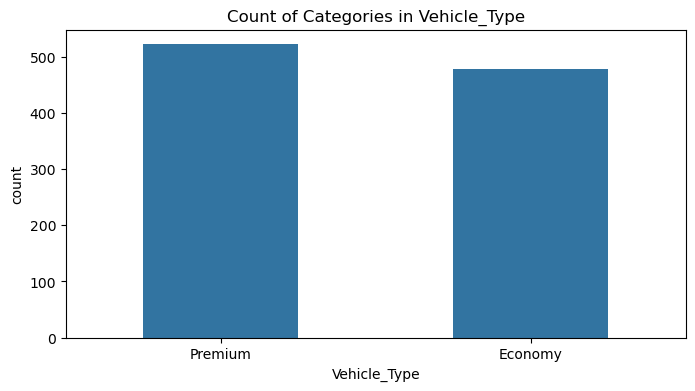

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[feature], width=0.5)
    plt.title(f'Count of Categories in {feature}')
    plt.show()

## 7. Analysis Summary for Categorical and Numerical Features

The data reveals a significant imbalance in the ride-sharing service, with an average of 60.37 riders per ride compared to 27.08 drivers. This disparity suggests a potential supply and demand issue, which could result in longer wait times for riders or reduced earnings for drivers, particularly during peak hours. Despite this, customer satisfaction appears generally positive, as indicated by an average rating of 4.26 out of 5. The ride durations show substantial variability, ranging from 10 to 180 minutes, directly influencing the wide distribution of historical ride costs, from 25.99 to $836.12.

Urban areas dominate the booking landscape, accounting for the largest share of rides, while the customer base is relatively evenly split across loyalty statuses, with Silver being the most common. Nighttime bookings are notably the most frequent, pointing to increased demand during this period. Additionally, premium vehicle types are favored by more than half of the customers, reflecting a preference for higher-end service options. This data suggests opportunities for optimizing supply in urban areas, particularly during high-demand periods, and potentially expanding premium offerings to cater to customer preferences.

## 8. Bivariate Analysis: Numerical Features vs. Historical_Cost_of_Ride

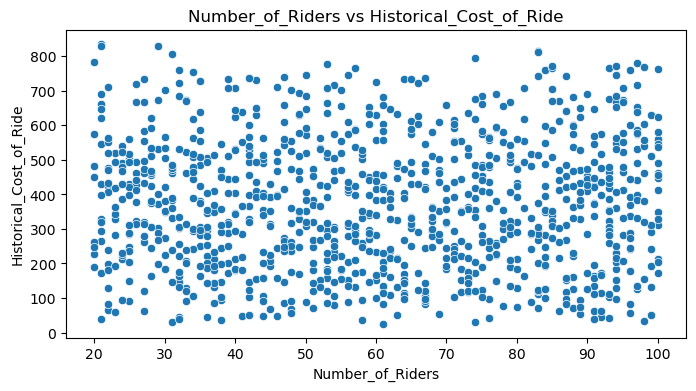

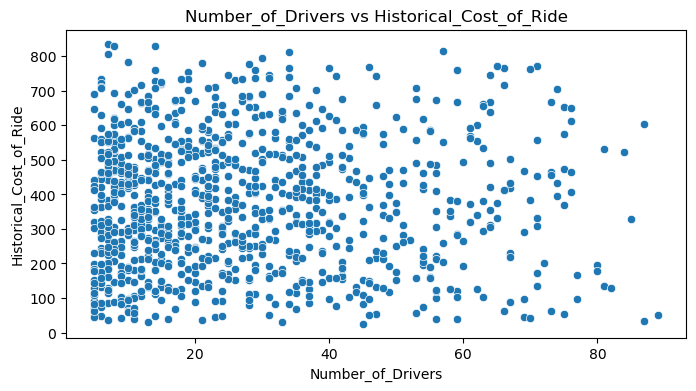

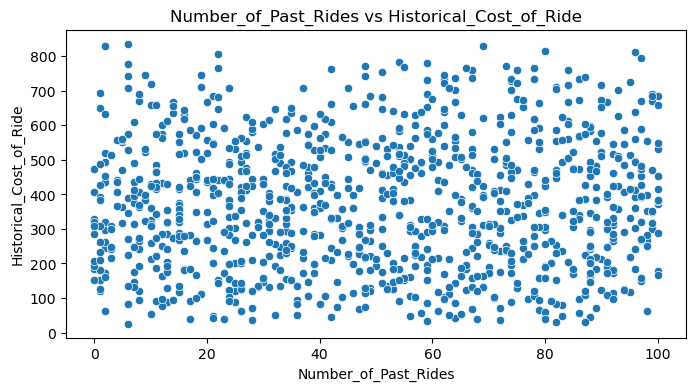

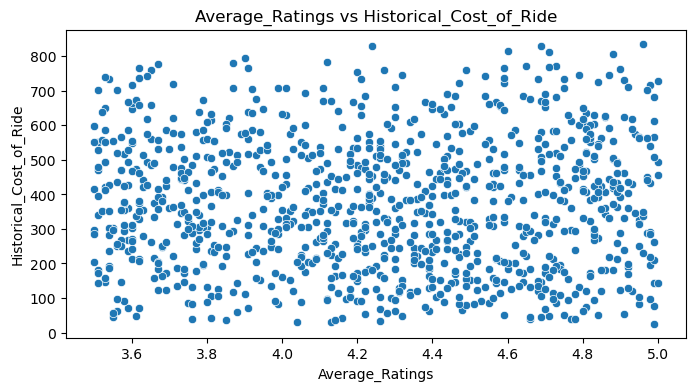

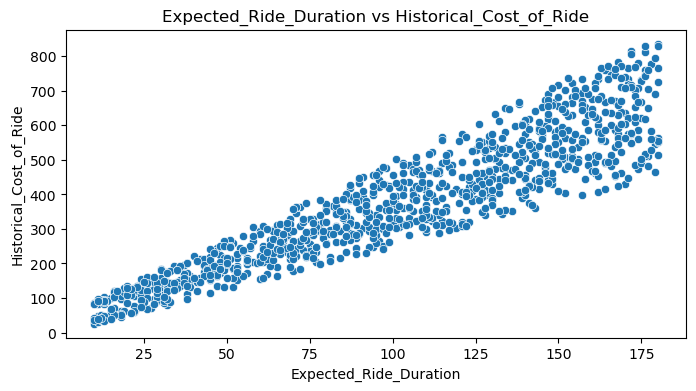

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Historical_Cost_of_Ride')

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[feature], y=df['Historical_Cost_of_Ride'])
    plt.title(f'{feature} vs Historical_Cost_of_Ride')
    plt.xlabel(feature)
    plt.ylabel('Historical_Cost_of_Ride')
    plt.show()

<Axes: >

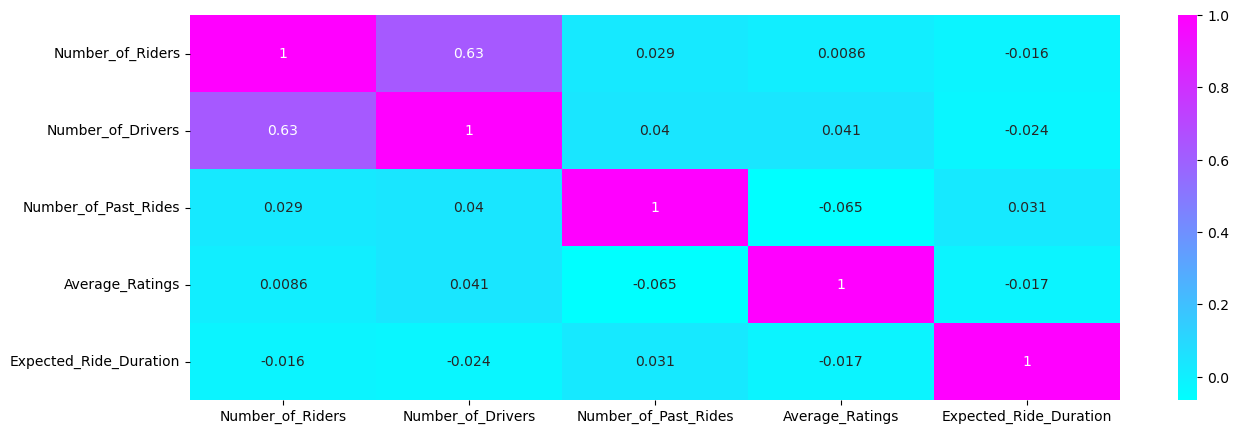

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df[numerical_features].corr(), cmap="cool", annot=True)

## 9. Examined Categorical Features vs. Historical_Cost_of_Ride

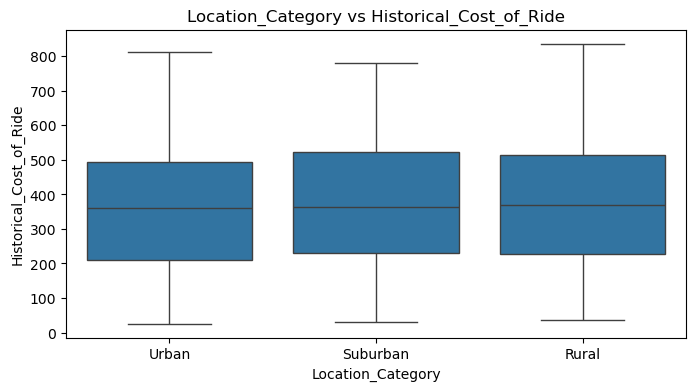

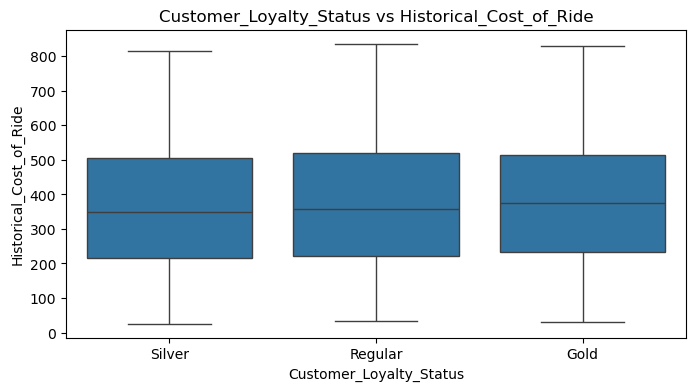

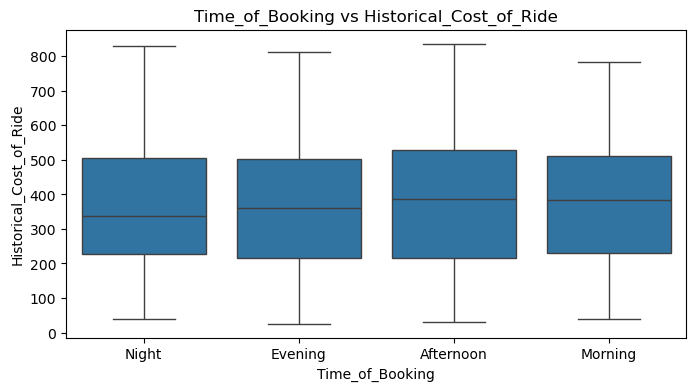

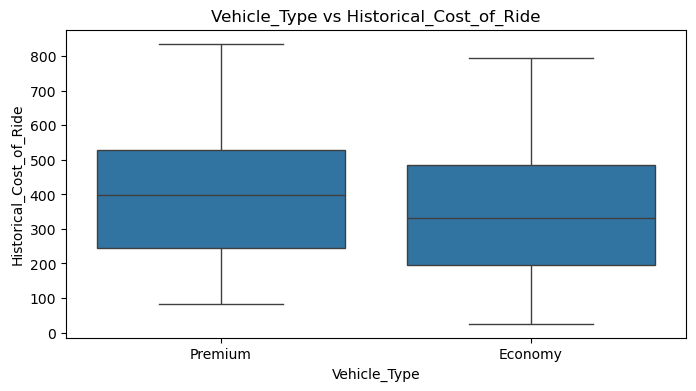

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], y=df['Historical_Cost_of_Ride'])
    plt.title(f'{feature} vs Historical_Cost_of_Ride')
    plt.xlabel(feature)
    plt.ylabel('Historical_Cost_of_Ride')
    plt.show()

## 10. Summary of Insights for Feature Selectionn

Numerical Features Analysis:
- Historical Cost of Ride is Strongly correlated with expected ride duration, indicating a direct relationship between distance and cost.
- Moderate correlation with the availability of drivers. A lower number of drivers during peak demand times can lead to higher ride costs due to scarcity.
- Weak or no correlation with number of riders, average ratings and number of past rides  suggesting that these factors have minimal impact on the overall cost.

Categorical Features Analysis:
- The Location category is expected to have a significant impact on the cost of rides, as urban areas typically have more traffic and demand, potentially leading to higher costs.
- Vehicle type is the also expected to be a significant factor influencing ride cost, with premium vehicles generally costing more than economy vehicles.
- Platforms often implement surge pricing during peak times to incentivize drivers and balance supply and demand so Rides booked during peak hours (e.g., rush hour, weekends) might experience higher costs due to increased demand and limited driver availability.
- The loyalty status could influence ride costs, with Silver members potentially receiving discounts or having different pricing structures compared to regular customers.

All in All, the EDA process has identified several key features that are potentially important for predicting the Historical Cost of Ride. The duration of the ride, location, vehicle type, availability of drivers, time of booking and customer loyalty status stand out as the most influential factors. These features should be prioritized in the model development phase to accurately predict ride costs. Other features like past rides of customers and average ratings offer valuable insights into customer satisfaction, behavioural patterns and ride pricing dynamics.